# 決定木を組み合わせてランダムフォレストを作成する

#### 決定木の欠点

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.25, random_state=100)

Text(0, 0.5, 'feature 2')

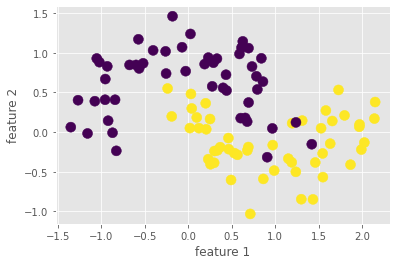

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], s=100, c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [19]:
import numpy as np
def plot_decision_boundary(classifier, X_test, y_test):
    h = 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
    ret = classifier.predict(X_hypo)
    if isinstance(ret, tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0] ,X_test[:, 1], c=y_test, s=200)

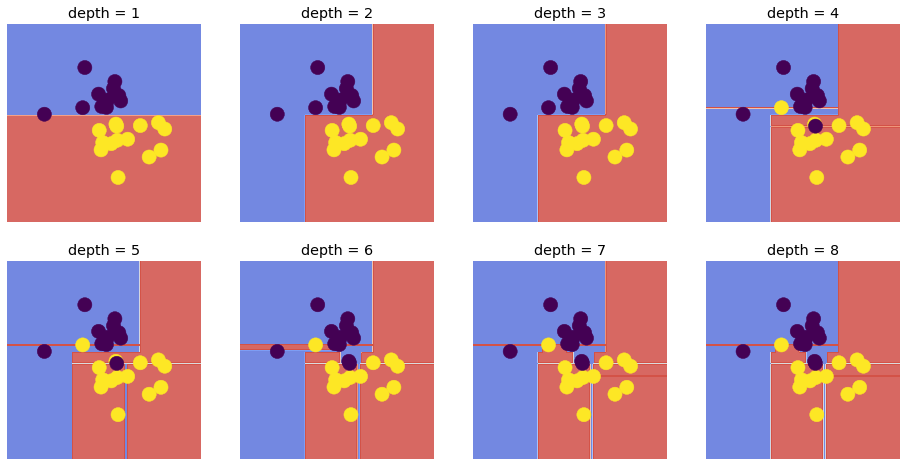

In [20]:
from sklearn.tree import DecisionTreeClassifier
plt.figure(figsize=(16, 8))
for depth in range(1, 9):
    plt.subplot(2, 4, depth)
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X, y)
    y_test = tree.predict(X_test)
    plot_decision_boundary(tree, X_test, y_test)
    plt.axis('off')
    plt.title('depth = %d' % depth)

#### ランダムフォレストの実装

In [27]:
import cv2
rtree = cv2.ml.RTrees_create()

In [29]:
n_trees = 10
eps = 0.01
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, n_trees, eps)
rtree.setTermCriteria(criteria)
rtree.train(X_train.astype(np.float32), cv2.ml.ROW_SAMPLE, y_train);

In [30]:
_, y_hat = rtree.predict(X_test.astype(np.float32))

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.84

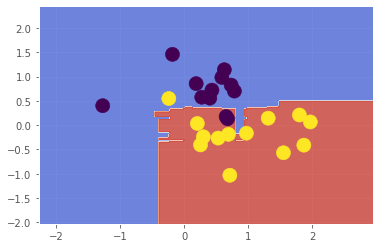

In [32]:
plot_decision_boundary(rtree, X_test, y_test)

#### scikit-learnでのランダムフォレストの実装

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=200)

In [34]:
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.84

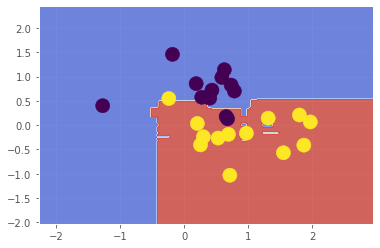

In [35]:
plot_decision_boundary(forest, X_test, y_test)

#### extremely randomized trees

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree = ExtraTreesClassifier(n_estimators=10, random_state=100)

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [39]:
extra_tree.fit(X_train, y_train)
extra_tree.score(X_test, y_test)

0.9210526315789473

In [41]:
forest = RandomForestClassifier(n_estimators=10, random_state=100)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9210526315789473

In [42]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9210526315789473

In [43]:
classifiers = [
    (1, 'decision tree', tree),
    (2, 'random forest', forest),
    (3, 'extremely randomized trees', extra_tree)
]

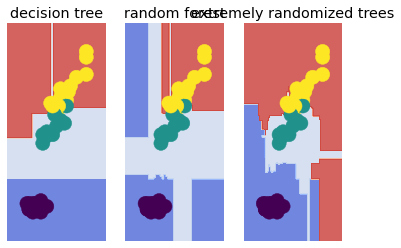

In [45]:
for sp, name, model in classifiers:
    plt.subplot(1, 3, sp)
    plot_decision_boundary(model, X_test, y_test)
    plt.title(name)
    plt.axis('off')